In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [59]:
df_train=pd.read_csv("/content/SalaryData_Train.csv")
df_test=pd.read_csv("/content/SalaryData_Test.csv")

In [60]:
df=df_train.append(df_test)

In [61]:
df.head(5)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [62]:
from sklearn.preprocessing import LabelEncoder

In [63]:
cols=["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

In [64]:
df[cols]=df[cols].apply(LabelEncoder().fit_transform)

In [65]:
df.head(5)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K


In [66]:
#df.hist("Salary")

In [67]:
correlation=df.corr()

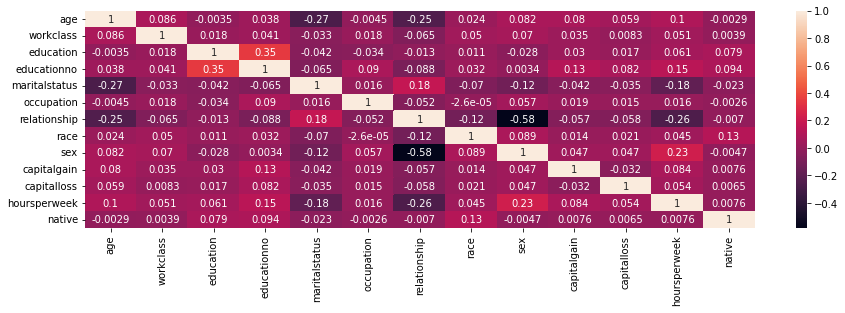

In [68]:
plt.figure(figsize=(15,4))
sns.heatmap(correlation,annot=True)
plt.show()

<Figure size 1080x288 with 0 Axes>

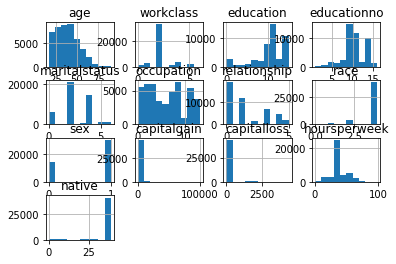

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [69]:
plt.figure(figsize=(15,4))
df.hist()
plt.show()
df.columns

In [70]:
X=df.drop(columns=["sex","capitalgain","capitalloss","native","Salary"],axis=1)

In [71]:
X.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,hoursperweek
0,39,5,9,13,4,0,1,4,40
1,50,4,9,13,2,3,0,4,13
2,38,2,11,9,0,5,1,4,40
3,53,2,1,7,2,5,0,2,40
4,28,2,9,13,2,9,5,2,40


In [72]:
y=df["Salary"]

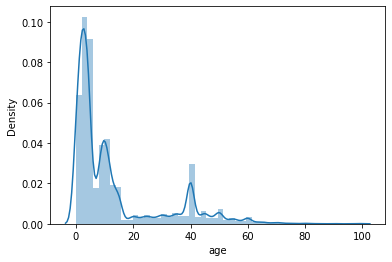

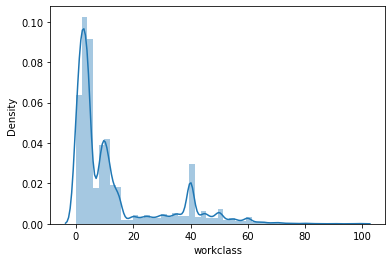

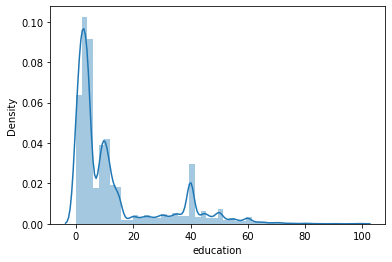

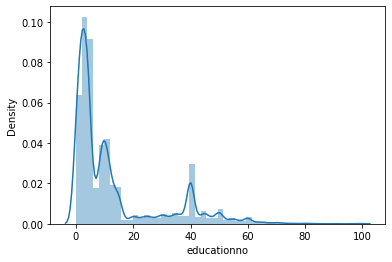

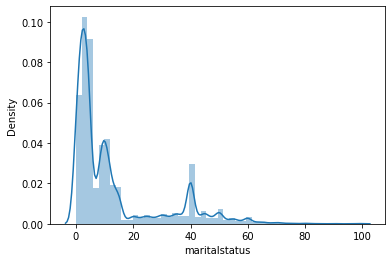

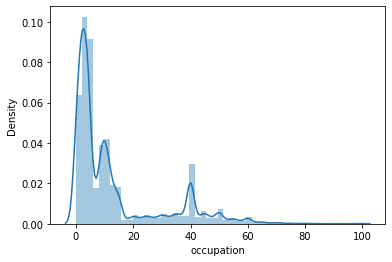

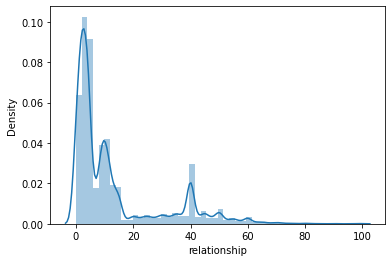

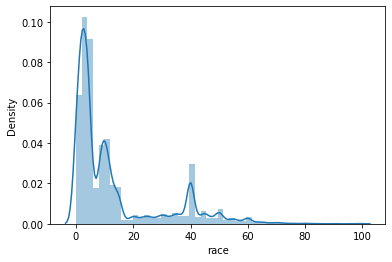

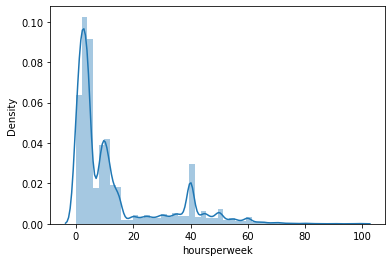

In [73]:
for i, col in enumerate(X.columns):
    plt.figure(i)
    sns.distplot(X,axlabel=X.columns[i])
    plt.show()

In [74]:
df.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((36176, 9), (9045, 9), (36176,), (9045,))

In [77]:
from sklearn.naive_bayes import GaussianNB

In [78]:
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [80]:
y_pred=model.predict(x_test)

In [82]:
from sklearn.metrics import accuracy_score

In [83]:
acc=accuracy_score(y_test,y_pred)

In [84]:
acc

0.7974571586511885

In [85]:
#Check for overfitting and underfitting

In [87]:
print('Training set score: {:.4f}'.format(model.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(model.score(x_test, y_test)))

Training set score: 0.7909
Test set score: 0.7975
